# Binary Classification Model : Fatal vs Non-Fatal

## Importing required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report, accuracy_score, roc_auc_score
import warnings
warnings.filterwarnings('ignore')

## Reading data, Encoding, and defining independent and dependent features

In [2]:
# Load the dataset
data = pd.read_csv('../ADC_fil.csv')

# Encode categorical variables
label_encoders = {}
categorical_cols = ['Aircraft.damage', 'Aircraft.Category', 'Make.Grouped', 'Engine.Type', 'Purpose.of.flight', 'Weather.Condition', 'Broad.phase.of.flight']
for column in categorical_cols:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Define features and target
X = data[['Aircraft.damage', 'Aircraft.Category', 'Make.Grouped', 'Number.of.Engines', 'Engine.Type', 'Purpose.of.flight', 'Weather.Condition', 'Broad.phase.of.flight']]
y = data['Injury.Target']

## Spliting the data in 70 - 30 ratio

In [3]:
# Train-test split: 80-20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

## 1. Logistic Regression

#### Fitting and Predicting

In [4]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the Logistic Regression model
log_reg_model = LogisticRegression(max_iter=1000, class_weight='balanced')
log_reg_model.fit(X_train, y_train)

# Make predictions
y_pred_log_reg = log_reg_model.predict(X_test)
y_pred_proba_log_reg = log_reg_model.predict_proba(X_test)[:, 1]

#### Evaluating Logistic Regression Model

In [5]:
# Evaluate the model
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
class_report_log_reg = classification_report(y_test, y_pred_log_reg)
roc_auc_log_reg = roc_auc_score(y_test, y_pred_log_reg)

print("Logistic Regression Results:")
print("Training Score : ", log_reg_model.score(X_train, y_train))
print("Testing Score : ", log_reg_model.score(X_test, y_test))
print("Accuracy:", accuracy_log_reg)
print("ROC AUC : ", roc_auc_log_reg)
print("Confusion Matrix: ", conf_matrix_log_reg)
print("Classification Report:\n", class_report_log_reg)

Logistic Regression Results:
Training Score :  0.8766542559073985
Testing Score :  0.8757096163770859
Accuracy: 0.8757096163770859
ROC AUC :  0.8718634947018492
Confusion Matrix:  [[8449 1177]
 [ 268 1732]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.88      0.92      9626
           1       0.60      0.87      0.71      2000

    accuracy                           0.88     11626
   macro avg       0.78      0.87      0.81     11626
weighted avg       0.90      0.88      0.88     11626



#### Visualizations

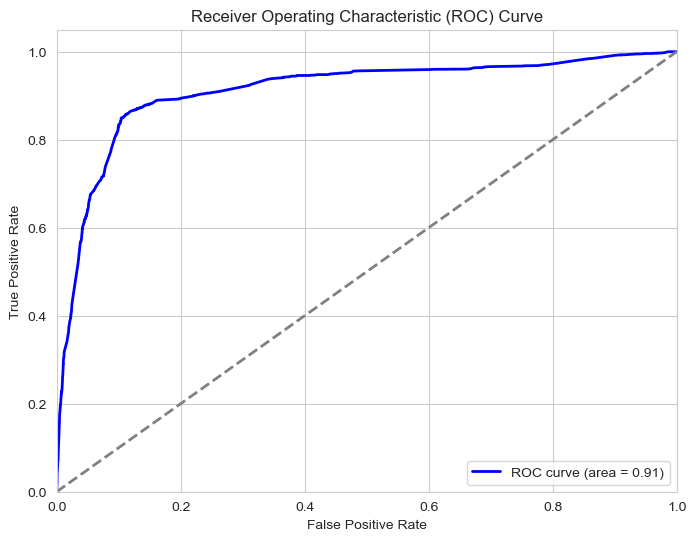

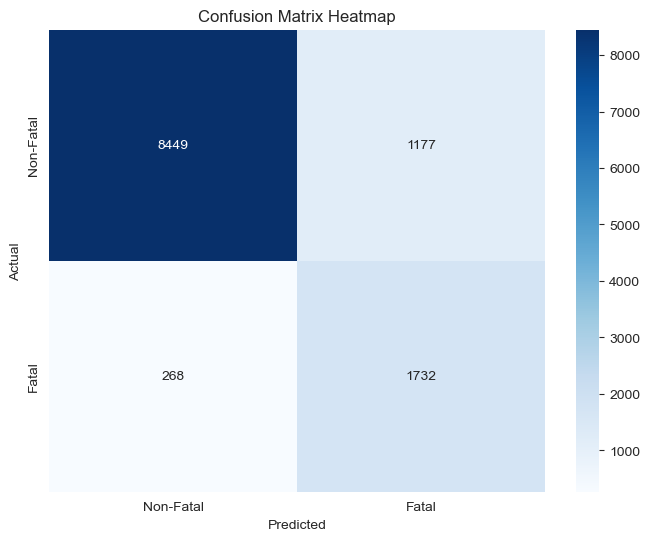

In [6]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_log_reg)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Plot Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_log_reg, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fatal', 'Fatal'], yticklabels=['Non-Fatal', 'Fatal'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()


## 2. Decision Tree Classifier

#### Fitting and Predicting

In [7]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the Decision Tree model
decision_tree_model = DecisionTreeClassifier(class_weight='balanced', random_state=42)
decision_tree_model.fit(X_train, y_train)

# Make predictions
y_pred_decision_tree = decision_tree_model.predict(X_test)
y_pred_proba_decision_tree = decision_tree_model.predict_proba(X_test)[:, 1]

#### Evaluating Decision Tree Model

In [8]:
# Evaluate the model
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
conf_matrix_decision_tree = confusion_matrix(y_test, y_pred_decision_tree)
class_report_decision_tree = classification_report(y_test, y_pred_decision_tree)
roc_auc_decision_tree = roc_auc_score(y_test, y_pred_decision_tree)

print("Decision Tree Results:")
print("Training Score: ", decision_tree_model.score(X_train, y_train))
print("Testing Score: ", decision_tree_model.score(X_test, y_test))
print("Accuracy:", accuracy_decision_tree)
print("ROC AUC: ", roc_auc_decision_tree)
print("Confusion Matrix: ", conf_matrix_decision_tree)
print("Classification Report:\n", class_report_decision_tree)

Decision Tree Results:
Training Score:  0.8869392118553471
Testing Score:  0.8731291931876828
Accuracy: 0.8731291931876828
ROC AUC:  0.8639673800124664
Confusion Matrix:  [[8451 1175]
 [ 300 1700]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.88      0.92      9626
           1       0.59      0.85      0.70      2000

    accuracy                           0.87     11626
   macro avg       0.78      0.86      0.81     11626
weighted avg       0.90      0.87      0.88     11626



#### Visualizations

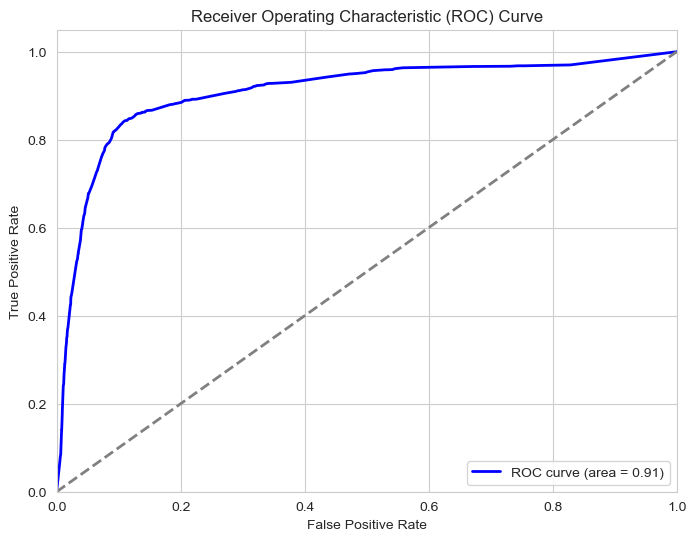

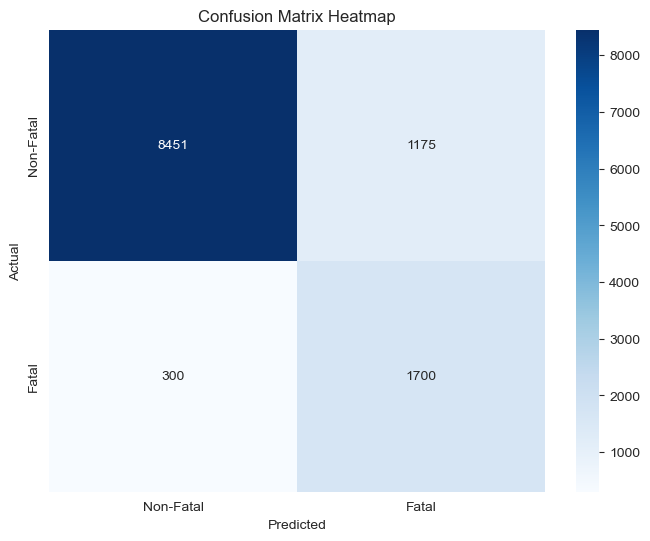

In [9]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_decision_tree)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Plot Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_decision_tree, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fatal', 'Fatal'], yticklabels=['Non-Fatal', 'Fatal'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

## 3. Random Forest Classifier

#### Fitting and Predicting

In [10]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest model
random_forest_model = RandomForestClassifier(class_weight='balanced', random_state=42)
random_forest_model.fit(X_train, y_train)

# Make predictions
y_pred_random_forest = random_forest_model.predict(X_test)
y_pred_proba_random_forest = random_forest_model.predict_proba(X_test)[:, 1]

#### Evaluating Random Forest model

In [11]:
# Evaluate the model
accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)
conf_matrix_random_forest = confusion_matrix(y_test, y_pred_random_forest)
class_report_random_forest = classification_report(y_test, y_pred_random_forest)
roc_auc_random_forest = roc_auc_score(y_test, y_pred_random_forest)

print("Random Forest Results:")
print("Training Score: ", random_forest_model.score(X_train, y_train))
print("Testing Score: ", random_forest_model.score(X_test, y_test))
print("Accuracy:", accuracy_random_forest)
print("ROC AUC: ", roc_auc_random_forest)
print("Confusion Matrix: ", conf_matrix_random_forest)
print("Classification Report:\n", class_report_random_forest)

Random Forest Results:
Training Score:  0.8903306668632728
Testing Score:  0.8791501806296232
Accuracy: 0.8791501806296232
ROC AUC:  0.8662169644712238
Confusion Matrix:  [[8528 1098]
 [ 307 1693]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.89      0.92      9626
           1       0.61      0.85      0.71      2000

    accuracy                           0.88     11626
   macro avg       0.79      0.87      0.82     11626
weighted avg       0.90      0.88      0.89     11626



#### Visualization

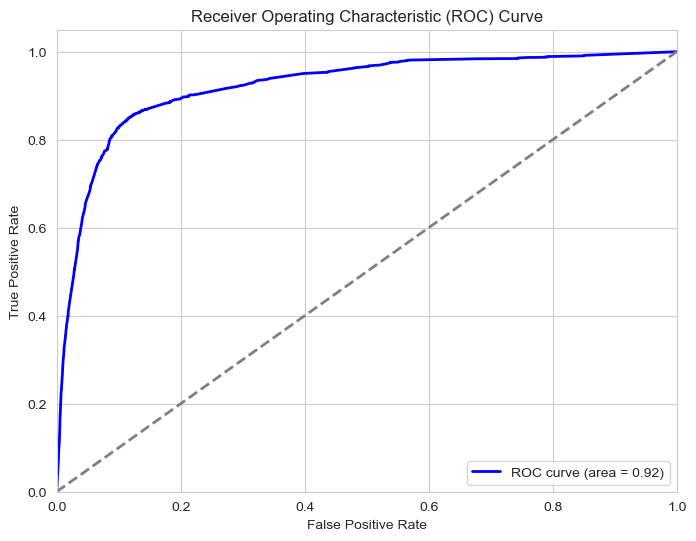

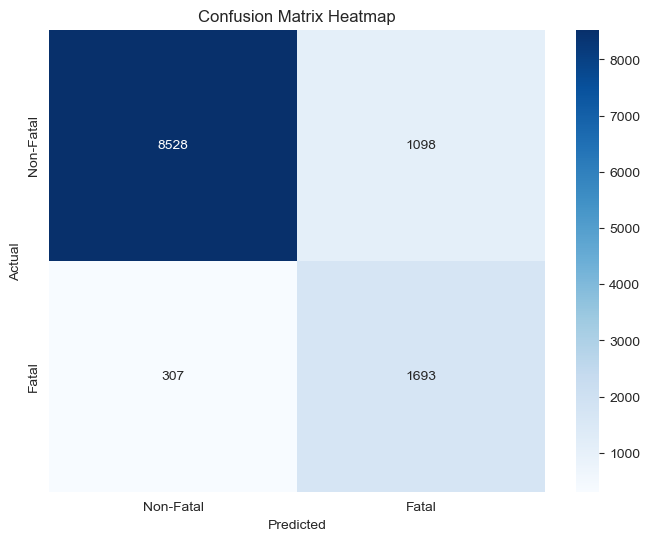

In [12]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_random_forest)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Plot Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_random_forest, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fatal', 'Fatal'], yticklabels=['Non-Fatal', 'Fatal'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

## 4. Linear Support Vector Classifier

#### Fitting and Predicting

In [13]:
from sklearn.svm import SVC

# Initialize and train the SVM model with a linear kernel
svm_linear_model = SVC(kernel='linear', class_weight='balanced', probability=True, random_state=42)
svm_linear_model.fit(X_train, y_train)

# Make predictions
y_pred_svm_linear = svm_linear_model.predict(X_test)
y_pred_proba_svm_linear = svm_linear_model.predict_proba(X_test)[:, 1]

#### Evaluating Linear SVC Model

In [14]:
# Evaluate the model
accuracy_svm_linear = accuracy_score(y_test, y_pred_svm_linear)
conf_matrix_svm_linear = confusion_matrix(y_test, y_pred_svm_linear)
class_report_svm_linear = classification_report(y_test, y_pred_svm_linear)
roc_auc_svm_linear = roc_auc_score(y_test, y_pred_svm_linear)

print("SVM (Linear Kernel) Results:")
print("Training score : ", svm_linear_model.score(X_train, y_train))
print("Testing score : ", svm_linear_model.score(X_test, y_test))
print("Accuracy:", accuracy_svm_linear)
print("ROC AUC: ", roc_auc_svm_linear)
print("Confusion Matrix: ", conf_matrix_svm_linear)
print("Classification Report:\n", class_report_svm_linear)

SVM (Linear Kernel) Results:
Training score :  0.8841744387510598
Testing score :  0.8845690693273697
Accuracy: 0.8845690693273697
ROC AUC:  0.8716679825472677
Confusion Matrix:  [[8580 1046]
 [ 296 1704]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.89      0.93      9626
           1       0.62      0.85      0.72      2000

    accuracy                           0.88     11626
   macro avg       0.79      0.87      0.82     11626
weighted avg       0.91      0.88      0.89     11626



#### Visualizations

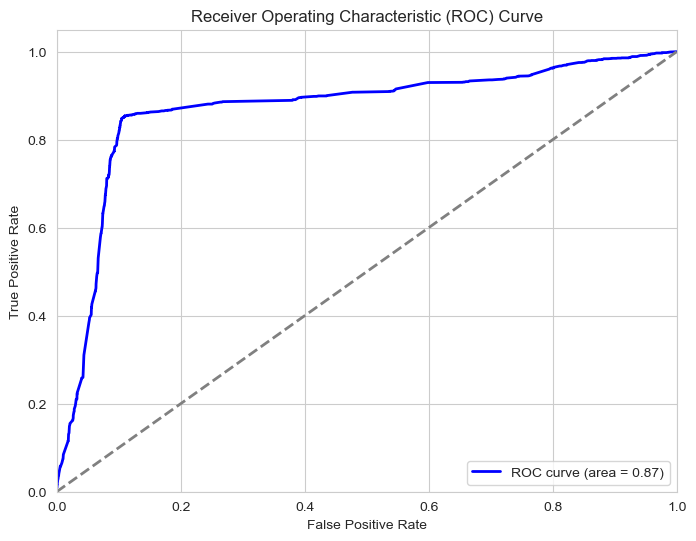

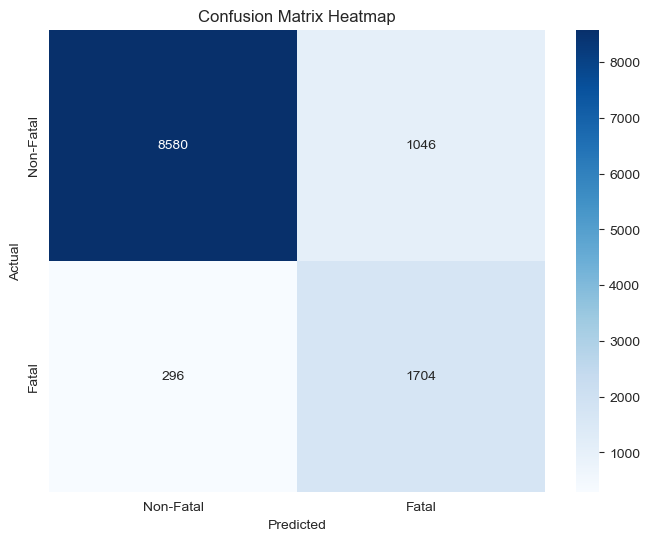

In [15]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_svm_linear)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Plot Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm_linear, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fatal', 'Fatal'], yticklabels=['Non-Fatal', 'Fatal'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

## 5. RBF Kernel Support Vector Classifier

#### Fitting and Predicting

In [16]:
# Initialize and train the SVM model with an RBF kernel
svm_rbf_model = SVC(kernel='rbf', class_weight='balanced', probability=True, random_state=42)
svm_rbf_model.fit(X_train, y_train)

# Make predictions
y_pred_svm_rbf = svm_rbf_model.predict(X_test)
y_pred_proba_svm_rbf = svm_rbf_model.predict_proba(X_test)[:, 1]

#### Evaluating RBF Kernel SVC Model

In [17]:
# Evaluate the model
accuracy_svm_rbf = accuracy_score(y_test, y_pred_svm_rbf)
conf_matrix_svm_rbf = confusion_matrix(y_test, y_pred_svm_rbf)
class_report_svm_rbf = classification_report(y_test, y_pred_svm_rbf)
roc_auc_svm_rbf = roc_auc_score(y_test, y_pred_svm_rbf)

print("SVM (RBF Kernel) Results:")
print("Training score : ", svm_rbf_model.score(X_train, y_train))
print("Testing score : ", svm_rbf_model.score(X_test, y_test))
print("Accuracy:", accuracy_svm_rbf)
print("ROC AUC: ", roc_auc_svm_rbf)
print("Confusion Matrix: ", conf_matrix_svm_rbf)
print("Classification Report:\n", class_report_svm_rbf)

SVM (RBF Kernel) Results:
Training score :  0.8835108932060309
Testing score :  0.8843110270084293
Accuracy: 0.8843110270084293
ROC AUC:  0.8713140972366509
Confusion Matrix:  [[8578 1048]
 [ 297 1703]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.89      0.93      9626
           1       0.62      0.85      0.72      2000

    accuracy                           0.88     11626
   macro avg       0.79      0.87      0.82     11626
weighted avg       0.91      0.88      0.89     11626



#### Visualizations

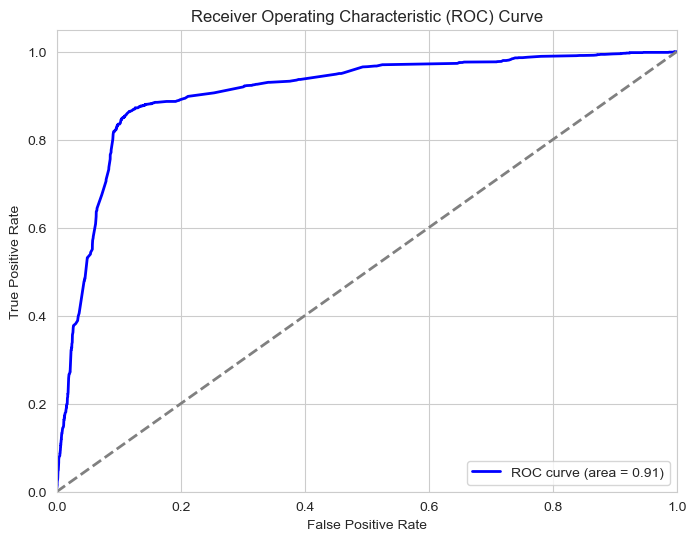

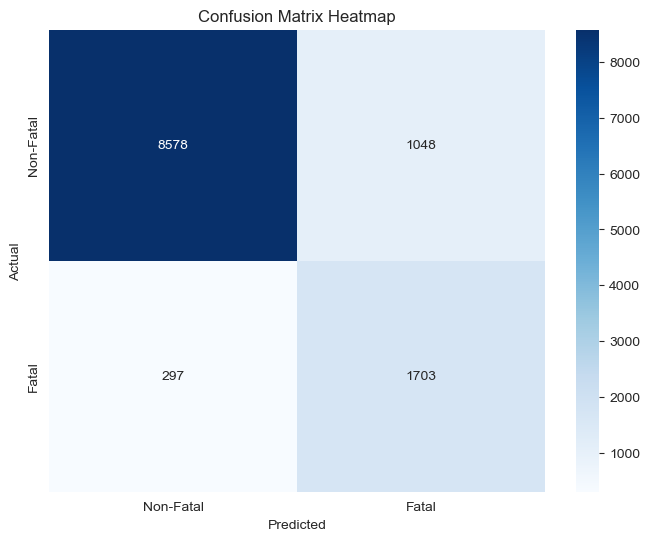

In [18]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_svm_rbf)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Plot Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm_rbf, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fatal', 'Fatal'], yticklabels=['Non-Fatal', 'Fatal'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

## 6. Gradient Boosting Classifier

#### Fitting and Predicting

In [19]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize and train the Gradient Boosting model
gradient_boosting_model = GradientBoostingClassifier(random_state=42)
gradient_boosting_model.fit(X_train, y_train)

# Make predictions
y_pred_gradient_boosting = gradient_boosting_model.predict(X_test)
y_pred_proba_gradient_boosting = gradient_boosting_model.predict_proba(X_test)[:, 1]

#### Evaluating Gradient Boosting Model

In [20]:
# Evaluate the model
accuracy_gradient_boosting = accuracy_score(y_test, y_pred_gradient_boosting)
conf_matrix_gradient_boosting = confusion_matrix(y_test, y_pred_gradient_boosting)
class_report_gradient_boosting = classification_report(y_test, y_pred_gradient_boosting)
roc_auc_gradient_boosting = roc_auc_score(y_test, y_pred_gradient_boosting)

print("Gradient Boosting Results:")
print("Training score : ", gradient_boosting_model.score(X_train, y_train))
print("Testing score : ", gradient_boosting_model.score(X_test, y_test))
print("Accuracy:", accuracy_gradient_boosting)
print("ROC AUC: ", roc_auc_gradient_boosting)
print("Confusion Matrix: ", conf_matrix_gradient_boosting)
print("Classification Report:\n", class_report_gradient_boosting)

Gradient Boosting Results:
Training score :  0.9066612599992627
Testing score :  0.9041802855668329
Accuracy: 0.9041802855668329
ROC AUC:  0.8330062850612924
Confusion Matrix:  [[9063  563]
 [ 551 1449]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94      9626
           1       0.72      0.72      0.72      2000

    accuracy                           0.90     11626
   macro avg       0.83      0.83      0.83     11626
weighted avg       0.90      0.90      0.90     11626



#### Visualizations

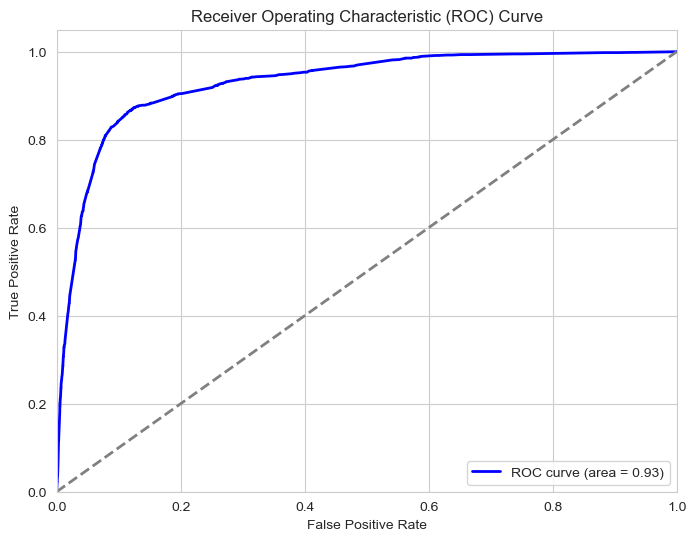

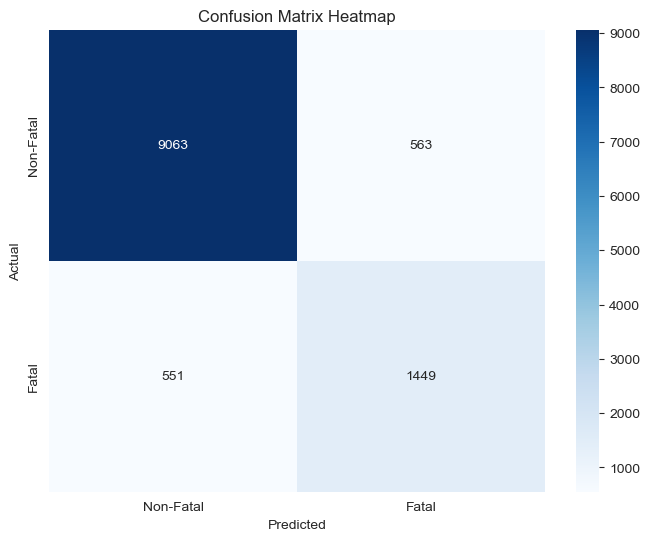

In [21]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_gradient_boosting)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Plot Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gradient_boosting, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fatal', 'Fatal'], yticklabels=['Non-Fatal', 'Fatal'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

## 7. Extreme Gradient Boosting - XGBoost

#### Fitting and Predicting

In [22]:
from xgboost import XGBClassifier

# Initialize and train the XGBoost model
xgboost_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgboost_model.fit(X_train, y_train)

# Make predictions
y_pred_xgboost = xgboost_model.predict(X_test)
y_pred_proba_xgboost = xgboost_model.predict_proba(X_test)[:, 1]

#### Evaluating XGBoost Model

In [23]:
# Evaluate the model
accuracy_xgboost = accuracy_score(y_test, y_pred_xgboost)
conf_matrix_xgboost = confusion_matrix(y_test, y_pred_xgboost)
class_report_xgboost = classification_report(y_test, y_pred_xgboost)
roc_auc_xgboost = roc_auc_score(y_test, y_pred_xgboost)

print("XGBoost Results:")
print("Training score : ", xgboost_model.score(X_train, y_train))
print("Testing score : ", xgboost_model.score(X_test, y_test))
print("Accuracy:", accuracy_xgboost)
print("ROC AUC: ", roc_auc_xgboost)
print("Confusion Matrix: ", conf_matrix_xgboost)
print("Classification Report:\n", class_report_xgboost)

XGBoost Results:
Training score :  0.9104213514210934
Testing score :  0.9030621021847584
Accuracy: 0.9030621021847584
ROC AUC:  0.8152980988988158
Confusion Matrix:  [[9136  490]
 [ 637 1363]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94      9626
           1       0.74      0.68      0.71      2000

    accuracy                           0.90     11626
   macro avg       0.84      0.82      0.82     11626
weighted avg       0.90      0.90      0.90     11626



#### Visualizations

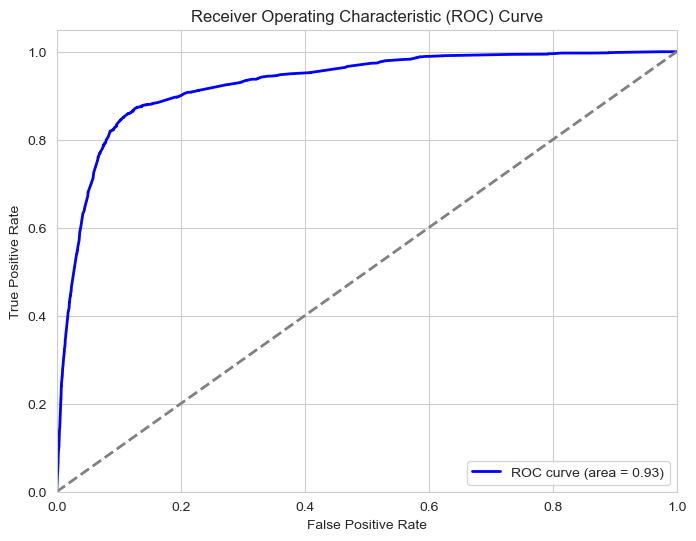

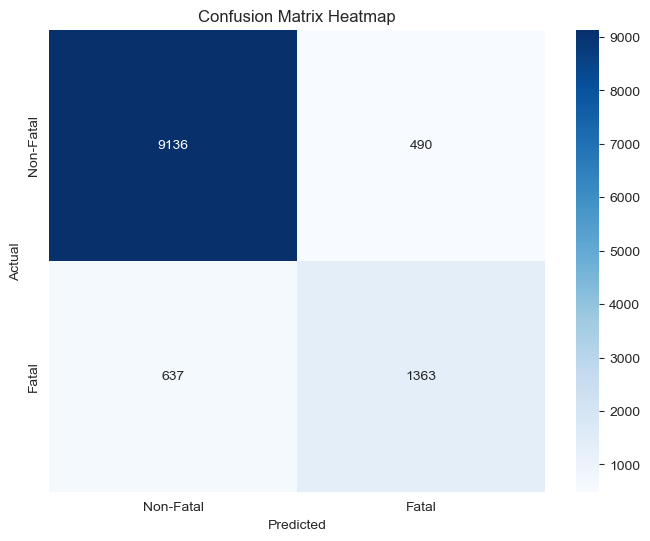

In [24]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_xgboost)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Plot Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgboost, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fatal', 'Fatal'], yticklabels=['Non-Fatal', 'Fatal'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()


## 8. Multi-Layer Perceptron (MLP)

#### Fitting and Predicting

In [25]:
from sklearn.neural_network import MLPClassifier

# Initialize and train the Neural Network model
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
mlp_model.fit(X_train, y_train)

# Make predictions
y_pred_mlp = mlp_model.predict(X_test)
y_pred_proba_mlp = mlp_model.predict_proba(X_test)[:, 1]

#### Evaluating MLP Model

In [26]:
# Evaluate the model
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
conf_matrix_mlp = confusion_matrix(y_test, y_pred_mlp)
class_report_mlp = classification_report(y_test, y_pred_mlp)
roc_auc_mlp = roc_auc_score(y_test, y_pred_mlp)

print("Neural Network (MLP) Results:")
print("Training score : ", mlp_model.score(X_train, y_train))
print("Testing score : ", mlp_model.score(X_test, y_test))
print("Accuracy:", accuracy_mlp)
print("ROC AUC: ", roc_auc_mlp)
print("Confusion Matrix: ", conf_matrix_mlp)
print("Classification Report:\n", class_report_mlp)

Neural Network (MLP) Results:
Training score :  0.9060714417370148
Testing score :  0.902201961121624
Accuracy: 0.902201961121624
ROC AUC:  0.8032913463536255
Confusion Matrix:  [[9184  442]
 [ 695 1305]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94      9626
           1       0.75      0.65      0.70      2000

    accuracy                           0.90     11626
   macro avg       0.84      0.80      0.82     11626
weighted avg       0.90      0.90      0.90     11626



#### Visualizations

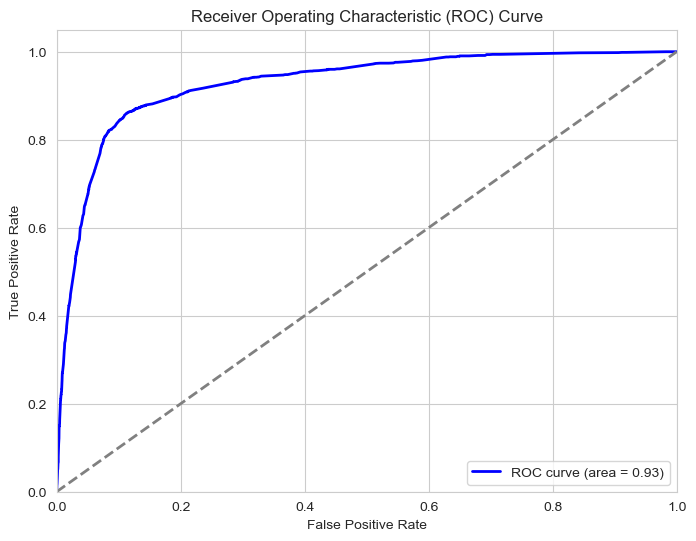

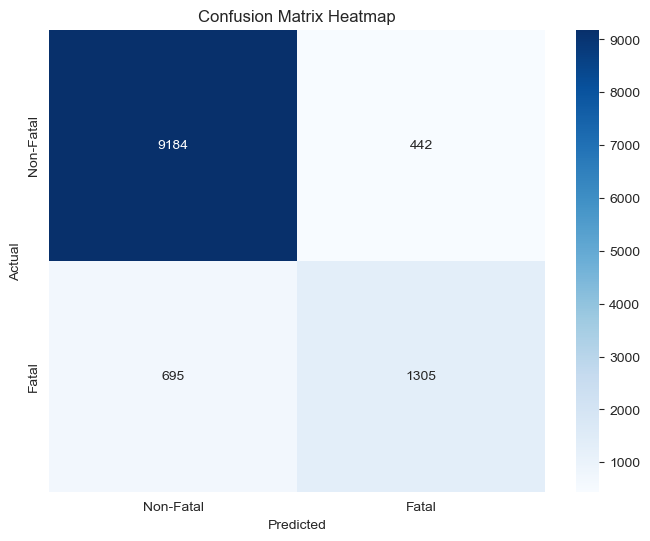

In [27]:

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_mlp)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Plot Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_mlp, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fatal', 'Fatal'], yticklabels=['Non-Fatal', 'Fatal'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

## 9. 1D Convolutional Neural Network (1D CNN)

#### Fitting and Predicting

In [28]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Reshape data for 1D CNN
X_train_reshaped = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_reshaped = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))

# Initialize and train the 1D CNN model
model = Sequential([
    Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_reshaped, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

# Make predictions
y_pred_prob_cnn = model.predict(X_test_reshaped)
y_pred_cnn = (y_pred_prob_cnn > 0.5).astype("int32")


Epoch 1/20
679/679 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.8497 - loss: 0.3595 - val_accuracy: 0.8800 - val_loss: 0.2636
Epoch 2/20
679/679 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8883 - loss: 0.2729 - val_accuracy: 0.8859 - val_loss: 0.2605
Epoch 3/20
679/679 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8884 - loss: 0.2680 - val_accuracy: 0.8850 - val_loss: 0.2596
Epoch 4/20
679/679 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8911 - loss: 0.2609 - val_accuracy: 0.8879 - val_loss: 0.2561
Epoch 5/20
679/679 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8895 - loss: 0.2597 - val_accuracy: 0.8782 - val_loss: 0.2558
Epoch 6/20
679/679 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8876 - loss: 0.2659 - val_accuracy: 0.8887 - val_loss: 0.2570
Epoch 7/20
679/679 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8848 - loss: 0.2708 - val_accuracy: 0.8844 - val_loss: 0.2586
Epoch 8/20
679/679 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8866 - loss: 0.2652 - val_accuracy: 0

#### Evaluating 1D CNN Model

In [29]:
# Evaluate the model
accuracy_cnn = accuracy_score(y_test, y_pred_cnn)
conf_matrix_cnn = confusion_matrix(y_test, y_pred_cnn)
class_report_cnn = classification_report(y_test, y_pred_cnn)
roc_auc_cnn = roc_auc_score(y_test, y_pred_cnn)

print("1D CNN Results:")
print("Accuracy:", accuracy_cnn)
print("ROC AUC : ", roc_auc_cnn)
print("Confusion Matrix : ", conf_matrix_cnn)
print("Classification Report:\n", class_report_cnn)

1D CNN Results:
Accuracy: 0.8910201273008773
ROC AUC :  0.8311988364845211
Confusion Matrix :  [[8879  747]
 [ 520 1480]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.92      0.93      9626
           1       0.66      0.74      0.70      2000

    accuracy                           0.89     11626
   macro avg       0.80      0.83      0.82     11626
weighted avg       0.90      0.89      0.89     11626



#### Visualizations

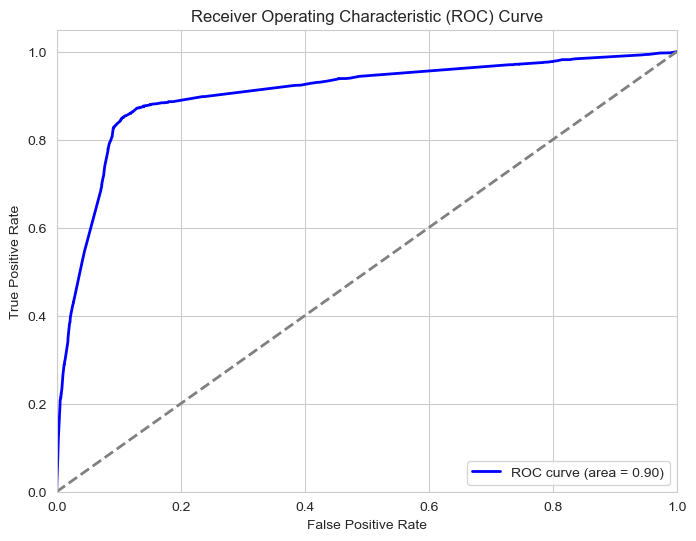

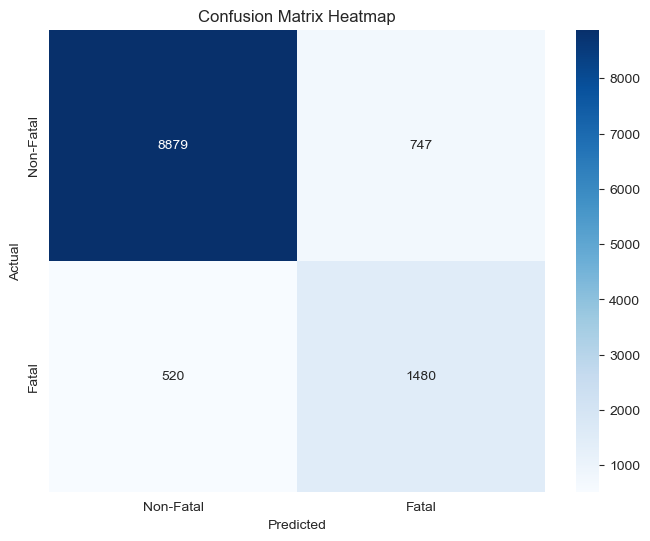

In [30]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob_cnn)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Plot Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_cnn, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fatal', 'Fatal'], yticklabels=['Non-Fatal', 'Fatal'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

## 10. TabNet Classifier

#### Fitting and Predicting

In [31]:
from pytorch_tabnet.tab_model import TabNetClassifier

# Initialize and train the TabNet model
tabnet_model = TabNetClassifier()
tabnet_model.fit(
    X_train.values, y_train.values,
    eval_set=[(X_test.values, y_test.values)],
    eval_metric=['accuracy', 'auc']
)

# Make predictions
y_pred_tabnet = tabnet_model.predict(X_test.values)
y_pred_proba_tabnet = tabnet_model.predict_proba(X_test.values)[:, 1]

epoch 0  | loss: 0.29579 | val_0_accuracy: 0.82797 | val_0_auc: 0.87099 |  0:00:09s
epoch 1  | loss: 0.26001 | val_0_accuracy: 0.82797 | val_0_auc: 0.87596 |  0:00:12s
epoch 2  | loss: 0.25376 | val_0_accuracy: 0.83047 | val_0_auc: 0.89109 |  0:00:15s
epoch 3  | loss: 0.2482  | val_0_accuracy: 0.83399 | val_0_auc: 0.90265 |  0:00:17s
epoch 4  | loss: 0.24509 | val_0_accuracy: 0.86092 | val_0_auc: 0.89744 |  0:00:20s
epoch 5  | loss: 0.24366 | val_0_accuracy: 0.88663 | val_0_auc: 0.9157  |  0:00:23s
epoch 6  | loss: 0.24334 | val_0_accuracy: 0.89068 | val_0_auc: 0.91998 |  0:00:26s
epoch 7  | loss: 0.24271 | val_0_accuracy: 0.89601 | val_0_auc: 0.92137 |  0:00:29s
epoch 8  | loss: 0.24224 | val_0_accuracy: 0.89653 | val_0_auc: 0.9226  |  0:00:31s
epoch 9  | loss: 0.24052 | val_0_accuracy: 0.89558 | val_0_auc: 0.92214 |  0:00:34s
epoch 10 | loss: 0.24184 | val_0_accuracy: 0.89687 | val_0_auc: 0.92281 |  0:00:37s
epoch 11 | loss: 0.23976 | val_0_accuracy: 0.89661 | val_0_auc: 0.92341 |  0

#### Evaluating TabNetClassifier Model

In [32]:
# Evaluate the model
accuracy_tabnet = accuracy_score(y_test, y_pred_tabnet)
conf_matrix_tabnet = confusion_matrix(y_test, y_pred_tabnet)
class_report_tabnet = classification_report(y_test, y_pred_tabnet)
roc_auc_tabnet = roc_auc_score(y_test, y_pred_tabnet)

print("TabNet Results:")
print("Accuracy:", accuracy_tabnet)
print("ROC AUC : ", roc_auc_tabnet)
print("Confusion Matrix : ", conf_matrix_tabnet)
print("Classification Report:\n", class_report_tabnet)

TabNet Results:
Accuracy: 0.9034921727163254
ROC AUC :  0.820509245792645
Confusion Matrix :  [[9116  510]
 [ 612 1388]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.94      9626
           1       0.73      0.69      0.71      2000

    accuracy                           0.90     11626
   macro avg       0.83      0.82      0.83     11626
weighted avg       0.90      0.90      0.90     11626



#### Visualizations

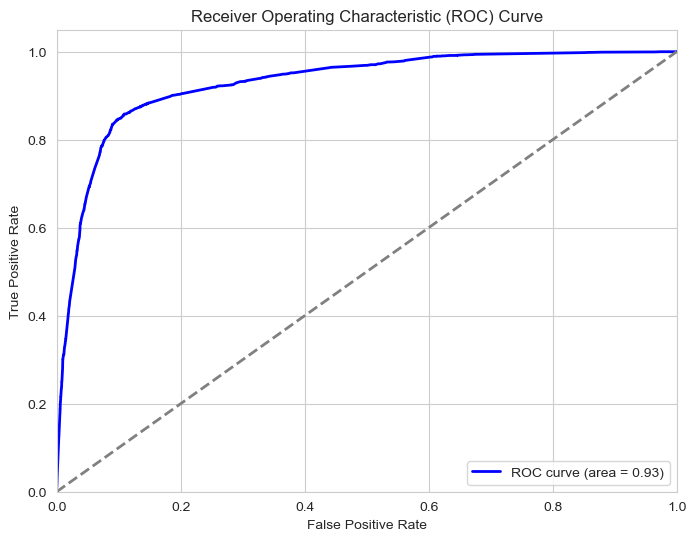

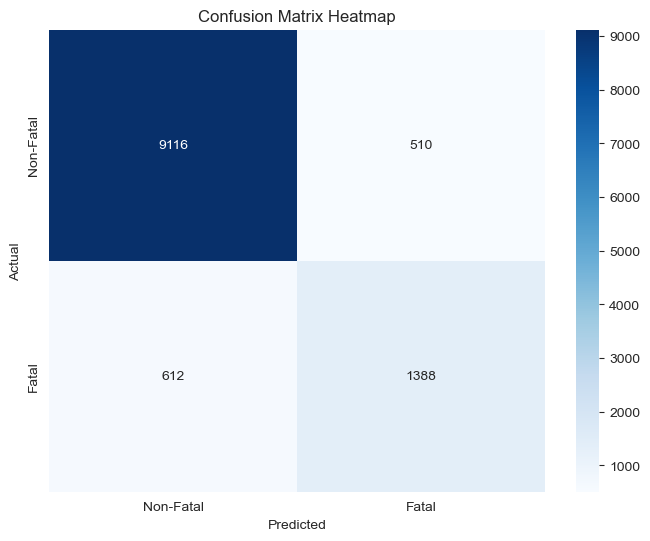

In [33]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_tabnet)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Plot Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_tabnet, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fatal', 'Fatal'], yticklabels=['Non-Fatal', 'Fatal'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

## 11. Stacking using Gradient Boosting, XGBoost & MLP

In [34]:
from sklearn.ensemble import StackingClassifier

# Define base models
base_models = [
    ('gb', GradientBoostingClassifier(random_state=42)),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)),
    ('mlp', MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42))
]

# Define the stacking classifier
stacking_clf = StackingClassifier(
    estimators=base_models,
    final_estimator=LogisticRegression(max_iter=1000, class_weight='balanced'),
    cv=3  # Number of folds for cross-validation
)

# Train the stacking classifier
stacking_clf.fit(X_train, y_train)

# Make predictions
y_pred = stacking_clf.predict(X_test)
y_pred_proba = stacking_clf.predict_proba(X_test)[:, 1]

In [35]:
# Evaluate the stacking model
accuracy_sr = accuracy_score(y_test, y_pred)
class_report_sr = classification_report(y_test, y_pred)
roc_auc_sr = roc_auc_score(y_test, y_pred_proba)
conf_matrix_sr = confusion_matrix(y_test, y_pred)

print("StackingClassifier Results:")
print("Accuracy:", accuracy_sr)
print("ROC AUC : ", roc_auc_sr)
print("Confusion Matrix : ", conf_matrix_sr)
print("Classification Report:\n", class_report_sr)

StackingClassifier Results:
Accuracy: 0.8977292275933253
ROC AUC :  0.9296975119468107
Confusion Matrix :  [[8780  846]
 [ 343 1657]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.91      0.94      9626
           1       0.66      0.83      0.74      2000

    accuracy                           0.90     11626
   macro avg       0.81      0.87      0.84     11626
weighted avg       0.91      0.90      0.90     11626



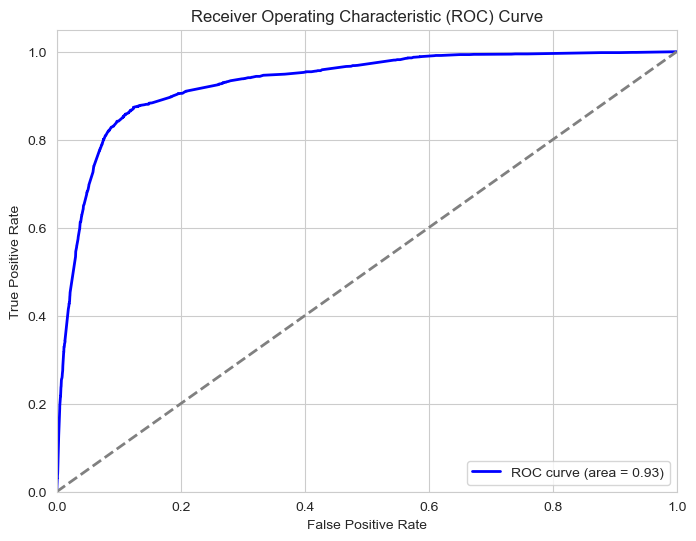

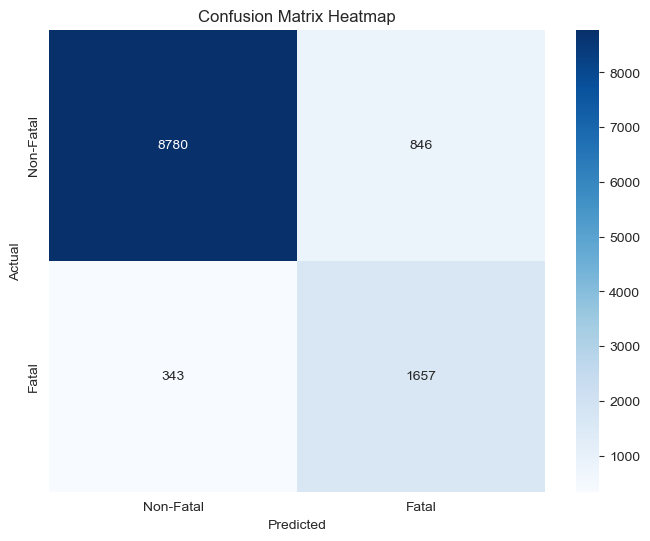

In [36]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_sr, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fatal', 'Fatal'], yticklabels=['Non-Fatal', 'Fatal'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()
